## Neural Network Development

## Preprocessing Data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout



## Now, let's upload the data

In [2]:
filepath = r'/Users/ureemjames/Downloads/Output_NoOutliers.csv'
data = pd.read_csv(filepath)

In [3]:
columns_to_drop = data.columns.to_list()[0]

In [4]:
data.drop(columns = [columns_to_drop], axis = 1, inplace = True)

In [6]:
object_variables = ['RIAGENDR',
'RIDRETH3',
'DMDBORN4',
'DMDEDUC2',
'DMDMARTZ',
'BPQ020',
'BPQ080',
'CDQ001',
'CDQ010',
'HSQ590',
'FSD162',
'HEQ010',
'HEQ030',
'IMQ011',
'IMQ020',
'KIQ022',
'KIQ044',
'DPQ020',
'MCQ010',
'MCQ080',
'MCQ092',
'PAQ620',
'PAQ665',
'RHQ131',
'SLQ050',
'SMQ020']

In [7]:
encoded_data = pd.get_dummies(data, columns = object_variables, prefix= object_variables, drop_first= True)

In [8]:
target_variable = 'DIQ010'

In [9]:
predictors_df = encoded_data.drop(columns = [target_variable], axis = 1)

In [10]:
target_df = encoded_data[target_variable]

In [11]:
from sklearn.model_selection import train_test_split

random_number = 1000

np.random.seed(random_number)

X_train, X_test, Y_train, Y_test = train_test_split(predictors_df, target_df, train_size=0.8, test_size=0.2, random_state=random_number)

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Y_train_reshape = Y_train.values.reshape(-1)
Y_test_reshape = Y_test.values.reshape(-1)

## Model Development & Settings

In [13]:
input_neurons = predictors_df.shape[1]
hidden_neurons = 2*input_neurons
output_neurons = 1

number_of_epochs = 100
loss_metrics = 'binary_crossentropy'
optimizer_method = 'SGD'
scoring_rules = ['accuracy']


activation_a = tf.keras.activations.tanh
activation_b = tf.keras.activations.sigmoid
activation_c = tf.keras.activations.relu
activation_d = tf.keras.activations.softmax





In [292]:
# random_seed = 42
# tf.random.set_seed(random_seed)


# model = Sequential()
# model.add(Input(shape = (input_neurons,)))
# model.add(Dense(hidden_neurons, activation = activation_c))
# model.add(Dense(hidden_neurons // 2, activation = activation_c))
# model.add(Dense(output_neurons, activation = activation_b))



# model.compile(optimizer = optimizer_method, loss = loss_metrics, metrics= scoring_rules)
# model.fit(X_train_scaled, Y_train_reshape, epochs= number_of_epochs, batch_size= 128, verbose = False, shuffle = True)


In [293]:
# loss, accuracy = model.evaluate(X_test_scaled, Y_test_reshape)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")


1892/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [294]:
# y_pred = model.predict(X_test_scaled)
# y_pred_classes = np.round(y_pred)

# precision = precision_score(Y_test_reshape, y_pred_classes)
# recall = recall_score(Y_test_reshape, y_pred_classes)
# accuracy = accuracy_score(Y_test_reshape, y_pred_classes)

# print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')

Precision: 0.7377622377622378, Recall: 0.6492307692307693, Accuracy: 0.9001057082452432


In [295]:
# optimizer_methods = ['adam', 'rmsprop', 'sgd', 'adadelta', 'adamax', 'nadam', 'ftrl', 'adagrad']


# results_dict = {'Optimizer': [], 'Accuracy': []}


# for optimizer_method in optimizer_methods:
#     model = Sequential()
#     model.add(Input(shape = (input_neurons,)))
#     model.add(Dense(hidden_neurons, activation = activation_c))
#     model.add(Dense(hidden_neurons // 2, activation = activation_c))
#     model.add(Dense(output_neurons, activation = activation_b))

#     model.compile(optimizer = optimizer_method, loss = loss_metrics, metrics= scoring_rules)
#     model.fit(X_train_scaled, Y_train_reshape, epochs= number_of_epochs, batch_size= 128, verbose = False)
#     y_pred = model.predict(X_test_scaled)
#     y_pred_classes = np.round(y_pred)
#     accuracy = accuracy_score(Y_test_reshape, y_pred_classes)

#     # Store results in the dictionary
#     results_dict['Optimizer'].append(optimizer_method)
#     results_dict['Accuracy'].append(accuracy)
    
    




In [296]:
# results_df = pd.DataFrame(results_dict)

In [297]:
# results_df

## Below is where we work on finding the best seed for the model

In [377]:
random_seeds = [42, 123, 789, 567, 888, 1111, 2022, 3333, 4545, 5555, 7777, 8888, 9999]


results = []

# Loop over each random seed
for random_seed in random_seeds:
    tf.random.set_seed(random_seed)
    
    # Build and compile the model
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    model.add(Dense(hidden_neurons, activation=activation_a))
    model.add(Dense(hidden_neurons // 2, activation=activation_c))
    model.add(Dense(hidden_neurons // 3, activation=activation_c))
    model.add(Dropout(0.3))
    model.add(Dense(output_neurons, activation=activation_b)) 
    model.compile(optimizer=optimizer_method, loss=loss_metrics, metrics=[scoring_rules])

    # Train the model
    model.fit(X_train_scaled, Y_train_reshape, epochs=200, batch_size=128, verbose=False, shuffle=True)
    
    # Evaluate the model on the test data
    y_pred = model.predict(X_test_scaled)
    y_pred_classes = np.round(y_pred)
    accuracy = accuracy_score(Y_test_reshape, y_pred_classes)
    precision = precision_score(Y_test_reshape, y_pred_classes)
    recall = recall_score(Y_test_reshape, y_pred_classes)
    loss, accuracy = model.evaluate(X_test_scaled, Y_test_reshape)
    
    # Append results to the list
    results.append({'Random_Seed': random_seed, 'Accuracy': accuracy, 'Loss': loss, 'Precision': precision, 'Recall': recall})

# Create a dataframe from the results list
results_df = pd.DataFrame(results)

1892/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [378]:
results_df

,Random_Seed,Accuracy,Loss,Precision,Recall
0,42,0.898520,0.261920,0.884393,0.470769
1,123,0.905391,0.232099,0.787402,0.615385
2,789,0.906448,0.238481,0.741830,0.698462
3,567,0.897463,0.273895,0.892216,0.458462
4,888,0.902220,0.252850,0.880435,0.498462
5,1111,0.909091,0.240848,0.855814,0.566154
6,2022,0.905920,0.243927,0.880829,0.523077
7,3333,0.906448,0.229964,0.791339,0.618462
8,4545,0.877907,0.271200,0.617500,0.760000
9,5555,0.908034,0.235253,0.847926,0.566154


# Our Selected Model

Train on 7567 samples
Epoch 1/200
7567/7567 [==============================] - 1s 135us/sample - loss: 0.4855 - accuracy: 0.8098
Epoch 2/200
7567/7567 [==============================] - 0s 49us/sample - loss: 0.4451 - accuracy: 0.8203
Epoch 3/200
7567/7567 [==============================] - 0s 50us/sample - loss: 0.4309 - accuracy: 0.8203
Epoch 4/200
7567/7567 [==============================] - 0s 55us/sample - loss: 0.4177 - accuracy: 0.8207
Epoch 5/200
7567/7567 [==============================] - 0s 49us/sample - loss: 0.4033 - accuracy: 0.8213
Epoch 6/200
7567/7567 [==============================] - 0s 57us/sample - loss: 0.3913 - accuracy: 0.8237
Epoch 7/200
7567/7567 [==============================] - 0s 48us/sample - loss: 0.3816 - accuracy: 0.8297
Epoch 8/200
7567/7567 [==============================] - 0s 50us/sample - loss: 0.3714 - accuracy: 0.8331
Epoch 9/200
7567/7567 [==============================] - 0s 48us/sample - loss: 0.3626 - accuracy: 0.8393
Epoch 10/200
7567/7567 

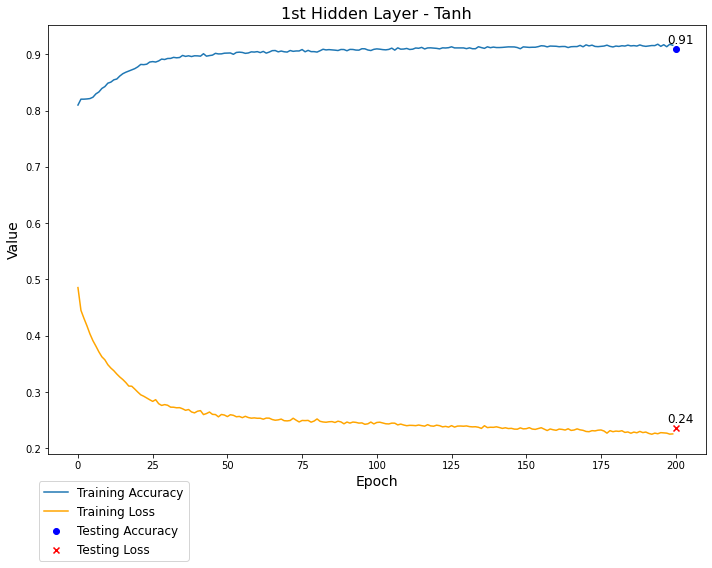

In [101]:
random_seed = 9999
tf.random.set_seed(random_seed)
    
# Build and compile the model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(hidden_neurons, activation=activation_a))
model.add(Dense(hidden_neurons // 2, activation=activation_c))
model.add(Dense(hidden_neurons // 3, activation=activation_c))
model.add(Dropout(0.3))
model.add(Dense(output_neurons, activation=activation_b)) 
model.compile(optimizer=optimizer_method, loss=loss_metrics, metrics=[scoring_rules])

model.fit(X_train_scaled, Y_train_reshape, epochs=200, batch_size=128, verbose=True, shuffle=True)
    
# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.round(y_pred)
accuracy = accuracy_score(Y_test_reshape, y_pred_classes)
precision = precision_score(Y_test_reshape, y_pred_classes)
recall = recall_score(Y_test_reshape, y_pred_classes)
loss, accuracy = model.evaluate(X_test_scaled, Y_test_reshape)

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.round(y_pred)

precision = precision_score(Y_test_reshape, y_pred_classes)
recall = recall_score(Y_test_reshape, y_pred_classes)
accuracy = accuracy_score(Y_test_reshape, y_pred_classes)
f1score = f1_score(Y_test_reshape, y_pred_classes)
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
specificity = (conf_matrix[0:0]/sum(conf_matrix[0:0] + conf_matrix[0:1]))

# print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')



train_loss, train_accuracy = model.evaluate(X_train_scaled, Y_train_reshape)
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test_reshape)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
# print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1score:.4f}")
print(f"Recall: {recall:.4f}")

# Get training history
training_history = model.history


# Plot accuracy and loss over epochs for training and testing
plt.figure(figsize=(10, 8))
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['loss'], label='Training Loss', color='orange')

# Show testing accuracy and loss as points with annotations
plt.scatter(len(training_history.history['accuracy']), test_accuracy, c='blue', marker='o', label='Testing Accuracy')
plt.scatter(len(training_history.history['loss']), test_loss, c='red', marker='x', label='Testing Loss')

# Annotate the points
plt.annotate(f'{test_accuracy:.2f}', (len(training_history.history['accuracy']), test_accuracy), textcoords="offset points", xytext=(5,5), ha='center', fontsize = 12)
plt.annotate(f'{test_loss:.2f}', (len(training_history.history['loss']), test_loss), textcoords="offset points", xytext=(5,5), ha='center', fontsize = 12)

plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.title('1st Hidden Layer - Tanh', fontsize = 16)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, -0.05), fontsize = 'large')

plt.tight_layout()
# plt.savefig('Adam Image 1.png')
plt.show()



# Testing Optimizer Strategy - Adam

Train on 7567 samples
Epoch 1/200
7567/7567 [==============================] - 1s 156us/sample - loss: 0.3846 - accuracy: 0.8375
Epoch 2/200
7567/7567 [==============================] - 0s 52us/sample - loss: 0.3080 - accuracy: 0.8739
Epoch 3/200
7567/7567 [==============================] - 0s 60us/sample - loss: 0.2839 - accuracy: 0.8883
Epoch 4/200
7567/7567 [==============================] - 0s 56us/sample - loss: 0.2695 - accuracy: 0.8968
Epoch 5/200
7567/7567 [==============================] - 0s 53us/sample - loss: 0.2589 - accuracy: 0.9017
Epoch 6/200
7567/7567 [==============================] - 0s 55us/sample - loss: 0.2596 - accuracy: 0.8988
Epoch 7/200
7567/7567 [==============================] - 0s 54us/sample - loss: 0.2562 - accuracy: 0.9037
Epoch 8/200
7567/7567 [==============================] - 0s 54us/sample - loss: 0.2472 - accuracy: 0.9066
Epoch 9/200
7567/7567 [==============================] - 0s 59us/sample - loss: 0.2375 - accuracy: 0.9113
Epoch 10/200
7567/7567 

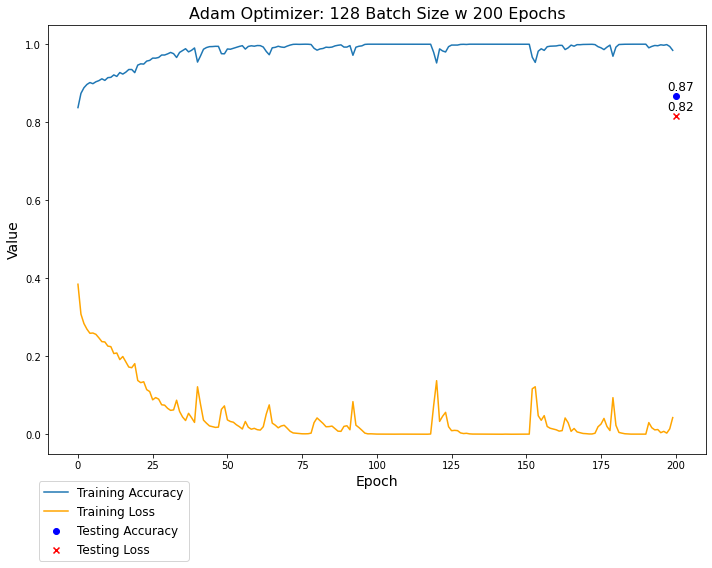

In [99]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate)

random_seed = 9999
tf.random.set_seed(random_seed)
    
# Build and compile the model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(hidden_neurons, activation=activation_a))
model.add(Dense(hidden_neurons // 2, activation=activation_c))
model.add(Dense(hidden_neurons // 3, activation=activation_c))
model.add(Dropout(0.3))
model.add(Dense(output_neurons, activation=activation_b)) 
model.compile(optimizer=adam_optimizer, loss=loss_metrics, metrics=[scoring_rules])

model.fit(X_train_scaled, Y_train_reshape, epochs=200, batch_size=128, verbose=True, shuffle=True)
    
# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.round(y_pred)
accuracy = accuracy_score(Y_test_reshape, y_pred_classes)
precision = precision_score(Y_test_reshape, y_pred_classes)
recall = recall_score(Y_test_reshape, y_pred_classes)
loss, accuracy = model.evaluate(X_test_scaled, Y_test_reshape)

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.round(y_pred)

precision = precision_score(Y_test_reshape, y_pred_classes)
recall = recall_score(Y_test_reshape, y_pred_classes)
accuracy = accuracy_score(Y_test_reshape, y_pred_classes)
f1score = f1_score(Y_test_reshape, y_pred_classes)
conf_matrix = confusion_matrix(Y_test, y_pred_classes)
specificity = (conf_matrix[0:0]/sum(conf_matrix[0:0] + conf_matrix[0:1]))


# print(f'Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}')


train_loss, train_accuracy = model.evaluate(X_train_scaled, Y_train_reshape)
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test_reshape)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
# print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1score:.4f}")


# Get training history
training_history = model.history


# Plot accuracy and loss over epochs for training and testing
plt.figure(figsize=(10, 8))
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['loss'], label='Training Loss', color='orange')

# Show testing accuracy and loss as points with annotations
plt.scatter(len(training_history.history['accuracy']), test_accuracy, c='blue', marker='o', label='Testing Accuracy')
plt.scatter(len(training_history.history['loss']), test_loss, c='red', marker='x', label='Testing Loss')

# Annotate the points
plt.annotate(f'{test_accuracy:.2f}', (len(training_history.history['accuracy']), test_accuracy), textcoords="offset points", xytext=(5,5), ha='center', fontsize = 12)
plt.annotate(f'{test_loss:.2f}', (len(training_history.history['loss']), test_loss), textcoords="offset points", xytext=(5,5), ha='center', fontsize = 12)

plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
plt.title('Adam Optimizer: 128 Batch Size w 200 Epochs', fontsize = 16)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, -0.05), fontsize = 'large')

plt.tight_layout()
# plt.savefig('Adam Image 1.png')
plt.show()
